#### Load libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize as opt
from scipy.io import loadmat

## 1 Multi-class Classification

#### 1.1 Dataset

In [113]:
input_layer_size = 400
num_labels = 10

data = loadmat('ex3data1.mat')
x, y = data['X'], data['y']
x = np.insert(x, 0, 1, axis=1)
y[y == 10] = 0

print('x:', x.shape)
print('y:', y.shape, 'unique y:', np.unique(y))


x: (5000, 401)
y: (5000, 1) unique y: [0 1 2 3 4 5 6 7 8 9]


#### 1.2 Visualizing the data

(-0.5, 199.5, 19.5, -0.5)

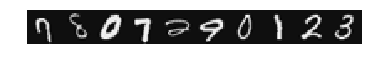

In [114]:
sample = np.random.choice(x.shape[0], 10)
plt.imshow(x[sample,1:].reshape(-1,20).T, cmap = 'gray')
plt.axis('off')

#### 1.3 Vectorizing logisitic regression

Creating sigmoid function

In [67]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

## TEST COST FUNCTION FOR SIZE
Creating unregularized cost function

In [174]:
def cost(theta, x, y, reg):
    h = sigmoid(np.dot(x, theta))
    m = y.size
    
    #cost = -1*(1/m)*(np.dot(np.log(h).T, y) + np.dot(np.log(1-h).T, 1-y)) + (reg/(2*m)*np.sum(np.square(theta[1:])))
    cost = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:])) 
    return cost

Creating unregularized gradient descent function

In [165]:
def gradient(theta, x, y, reg):
    h = sigmoid(np.dot(x, theta))
    m = y.size
    
    gradient = (1/m) * np.dot(x.T, (h-y)) + ((reg/m)*np.r_[[[0]], theta[1:].reshape(-1,1)])
    #gradient = (1/m)*np.dot(x.T, h-y) #[401x5000]
    #reg_term = theta[1:]*(reg/m) #[400x1]
    #gradient[1:,] = np.add(gradient[1:,],reg_term)
    
    return gradient

Test of gradient shape

In [166]:
m, n = x.shape
initial_theta = np.zeros(n)

test = gradient(initial_theta, x, y, 0)
print(test.shape)

(401, 5000)


In [168]:
# test values for the parameters theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# test values for the inputs
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# test values for the labels
y_t = np.array([1, 0, 1, 0, 1])

# test value for the regularization parameter
lambda_t = 3

In [73]:
print(X_t)

[[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]


In [175]:
j = cost(theta_t, X_t, y_t, lambda_t)
poll = gradient(theta_t, X_t, y_t, lambda_t)
print(j)

2.534819396109744


#### 1.4 One-vs-all classification

In [75]:
def opt_theta(theta, x, y, lambda_):
    opt_theta = optimize, minimize(cost)
    return opt_theta[0], opt_theta[1]

In [163]:
def one_all(x, y, num_labels, reg):
    m, n = x.shape
    initial_theta = np.zeros(n) #[401x1]
    all_theta = np.zeros((10, n)) #[10X401]
    for i in np.arange(1, num_labels):
        res = opt.minimize(cost,
                           x0 = initial_theta,
                           args = (x, y==i, reg),
                           method=None,
                           jac=gradient,
                           options={'maxiter':100}) #[1x401]
        all_theta[:, i] = res.x    
    print('Finished!')
    return all_theta #[10x401]

In [164]:
theta = one_all(x, y, 10, 0.1)

ValueError: shapes (401,401) and (2005000,) not aligned: 401 (dim 1) != 2005000 (dim 0)

In [61]:
initial_theta = np.zeros(n) #[401x1]
all_theta = np.zeros((10, n)) #[10X401]
print(all_theta.shape)

(10, 401)


In [37]:
m, n = x.shape
test =  np.zeros((10, m))
initial_theta = np.zeros(n)
print(test.shape, initial_theta.shape)

(10, 5000) (401,)
